In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 불러오기

df = pd.read_excel('car_evaluation.xlsx')

In [ ]:
ddf

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## 해당 데이터 인코딩 진행

In [ ]:
# 위의 컬럼은 다 사용하기!

X = df.drop(['class'],axis =1 )
y = df['class']

In [ ]:
# 인코딩 진행해야 함
#train test로도 나눠야 함

from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size =0.3, random_state=111)

In [ ]:
# 인코딩
import category_encoders as ce

In [ ]:
X.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

- OrdinalEncoder 이용해서 기존 x 피처들 인코딩

In [ ]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [ ]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1288,1,1,1,1,1,1
1056,1,2,1,2,2,2
1188,1,1,2,2,1,2
1099,1,3,2,1,1,1
463,2,4,3,2,2,1
...,...,...,...,...,...,...
681,2,3,3,2,3,2
1299,3,4,2,2,2,2
86,4,4,1,2,2,3
724,2,3,4,1,2,1


In [ ]:
X_test

,buying,maint,doors,persons,lug_boot,safety
18,1,1,1,1,1,1
1309,2,1,1,2,2,2
1083,3,2,1,3,2,1
655,4,2,1,3,3,2
282,1,2,2,2,2,1
...,...,...,...,...,...,...
565,4,4,1,1,3,2
1663,2,3,4,2,3,2
538,4,1,3,1,3,2
969,3,1,3,1,3,1


In [ ]:
X_test

,buying,maint,doors,persons,lug_boot,safety
18,1,1,1,1,1,1
1309,2,1,1,2,2,2
1083,3,2,1,3,2,1
655,4,2,1,3,3,2
282,1,2,2,2,2,1
...,...,...,...,...,...,...
565,4,4,1,1,3,2
1663,2,3,4,2,3,2
538,4,1,3,1,3,2
969,3,1,3,1,3,1


## Rf 모델 학습 진행

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=10, random_state=111) #rfc 모델
rfc1.fit(X_train, y_train)
y_pred1 = rfc1.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred1)))

모델 정확도 0.5087


### RF 모델 튜닝을 통해서 정확도를 올려보자!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(n_estimators=100, random_state=111) #rfc 모델
rfc2.fit(X_train, y_train)
y_pred2 = rfc2.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred2)))

모델 정확도 0.5087


- n_estimators 200으로 올려보기!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier(n_estimators=200, random_state=111) #rfc 모델
rfc3.fit(X_train, y_train)
y_pred3 = rfc3.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred3)))

모델 정확도 0.5106


- 학습하기 위해 n_estimators 올려보니 성능 0.01정도 성능이 올라갔다!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc4 = RandomForestClassifier(n_estimators=300, random_state=111) #rfc 모델
rfc4.fit(X_train, y_train)
y_pred4 = rfc4.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred4)))

모델 정확도 0.5087


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc5 = RandomForestClassifier(n_estimators=500, random_state=111) #rfc 모델
rfc5.fit(X_train, y_train)
y_pred5 = rfc5.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred5)))

모델 정확도 0.5067


- 적정선의 n_estimators 를 지정해 줘야 한다!

## RF의 피처의 중요도 확인하기!

In [ ]:
feature_score= pd.Series(rfc3.feature_importances_, index= X_train.columns).sort_values(ascending=False)

In [ ]:
#피처의 중요도를 확인할 수 있음
feature_score

safety      0.243247
persons     0.237038
buying      0.171129
maint       0.157355
doors       0.097487
lug_boot    0.093744
dtype: float64

<Axes: >

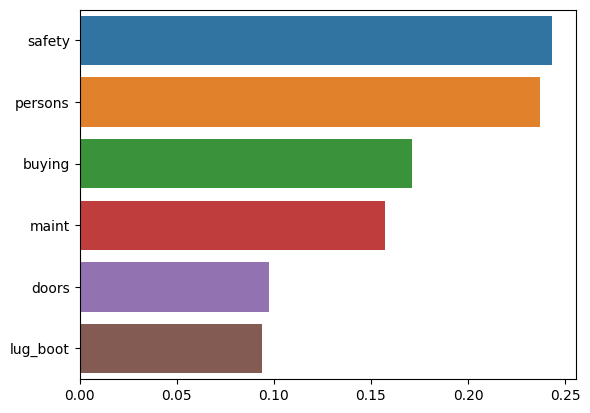

In [ ]:
sns.barplot(x = feature_score, y=feature_score.index) # 시각화로 피처의 중요도를 확인

## RF 피처의 중요도로 봤을 때
### 중요도가 상대적으로 낮은 애를 빼도 성능에 큰 문제가 발생하지 않을 것 같다.
- 차원을 축소해서 좀 더 성능을 높일 수 있지 않을까?

In [ ]:
# 피처 중요도가 낮은 컬럼을 하나 제거하고 진행하기

X = df.drop(['class','lug_boot'],axis =1 )
y = df['class']

In [ ]:
# 인코딩 진행해야 함
#train test로도 나눠야 함

from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size =0.3, random_state=111)

#인코딩 진행 ( 기존에서 2개 컬럼 제외 )
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'safety','doors'])

#인코딩
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

- 피처 중요도가 낮은 2개의 컬럼을 삭제하고 동일하게 RF모델 학습 진행

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier(n_estimators=300, random_state=111) #rfc 모델
rfc3.fit(X_train, y_train)
y_pred3 = rfc3.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred3)))

모델 정확도 0.4566


- 2개의 피처를  제외 모델 정확도 0.4566

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier(n_estimators=300, random_state=111) #rfc 모델
rfc3.fit(X_train, y_train)
y_pred3 = rfc3.predict(X_test) #예측값

In [ ]:
#정확도 확인하기
from sklearn.metrics import accuracy_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred3)))

모델 정확도 0.4933


- 1개의 피처를 제외( 1개의 피처를 다시 추가하여 정확도 ) 0.4933 확인

### 정확도 외에 다른 값들도 한 번 비교해 보자!

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         acc       0.13      0.16      0.14       104
        good       0.00      0.00      0.00        22
       unacc       0.68      0.64      0.66       372
       vgood       0.12      0.10      0.11        21

    accuracy                           0.49       519
   macro avg       0.23      0.22      0.23       519
weighted avg       0.51      0.49      0.50       519



- 왜 이렇게 성능자체가 다 다르고 문제가 발생하는 것일까?
- 클래스 자체의 불균형이 있기 때문에 이런 식으로 값이 엉망이 된다.

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

## RF 하이퍼파라미터 튜닝
- GridSearch
- BayesianOptimization
- hyperopt

- 세 가지로 비교해서 성능을 올려보자!

- RF의 성능을 올리기 위해서 우리가 확인해야 할 하이퍼파라미터 max_depth, min_sample_split, min_sample_leaf, n_estimators 것들을 확인
- 데이터에 따라 다를 수 있지만, 기본적으로 트리계열이기 때문에 해당 하이퍼파라미터들을 많이 보는 경우가 종종 있다.

- base_model 비교  - 정확도 0.5106

- 하이퍼파라미터 튜닝 시 위의 하이퍼파라미터
 Invalid parameter 'min_sample_leaf' for estimator RandomForestClassifier(max_depth=8, random_state=111). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,5,10]
}

rf_clf = RandomForestClassifier(random_state=111) # n_estimators=300 은 따로 넣지 않았지만 직접 넣어서도 수행해 보세요!
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv =3) #꼭 3을 할 필욘 없고 5, 10 다 가능
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=111),
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 5, 10]})

In [ ]:
print(grid_cv.best_params_)
print('{0:.4f}'.format(grid_cv.best_score_))

{'max_depth': 16, 'min_samples_leaf': 1}
0.8586


In [ ]:
#test로 비교해 보자!
rf_clf_grid = RandomForestClassifier(random_state=111, max_depth=16, min_samples_leaf=1 )
rf_clf_grid.fit(X_train, y_train)
pred_grid = rf_clf_grid.predict(X_test)
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, pred_grid)))

모델 정확도 0.5087


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,5,10]
}

rf_clf = RandomForestClassifier(n_estimators=300,random_state=111) # n_estimators=300 은 따로 넣지 않았지만 직접 넣어서도 수행해 보세요!
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv =3) #꼭 3을 할 필욘 없고 5, 10 다 가능
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=111),
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 5, 10]})

In [ ]:
print(grid_cv.best_params_)
print('{0:.4f}'.format(grid_cv.best_score_))

{'max_depth': 16, 'min_samples_leaf': 1}
0.8561


In [ ]:
#test로 비교해 보자!
rf_clf_grid = RandomForestClassifier(random_state=111, max_depth=16, min_samples_leaf=1,n_estimators=300)
rf_clf_grid.fit(X_train, y_train)
pred_grid = rf_clf_grid.predict(X_test)
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, pred_grid)))

모델 정확도 0.5087


- 0.5087 base 보다 더 낮게 나왔다.

- BayesianOptimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [ ]:
# 하나의 함수를 만들어서 성능 확인해 보기!


def rf_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    clf = RandomForestClassifier(
    n_estimators= int(n_estimators),
    max_depth= int(max_depth),
    min_samples_split= int(min_samples_split),
    min_samples_leaf= int(min_samples_leaf))

    return cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv=3).mean()

optimizer = BayesianOptimization(
    f = rf_eval,
    pbounds={
        'n_estimators' :(100,400),
        'max_depth':(10,40),
        'min_samples_split':(2,20),
        'min_samples_leaf':(1,20)
    }, random_state=111)


In [ ]:
optimizer.maximize(
n_iter= 25, # 최적화 수행할 반복 횟수
init_points =5) # 초기 랜덤 포인트 수

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8255    | 28.37     | 4.212     | 9.849     | 330.8     |
| 2         | 0.8395    | 18.86     | 3.834     | 2.405     | 226.1     |
| 3         | 0.7957    | 17.16     | 7.415     | 19.83     | 171.3     |
| 4         | 0.7775    | 12.44     | 13.72     | 13.18     | 182.3     |
| 5         | 0.8337    | 23.99     | 3.249     | 3.331     | 370.2     |
| 6         | 0.8503    | 19.48     | 1.0       | 2.0       | 247.6     |
| 7         | 0.8478    | 19.0      | 1.653     | 3.01      | 248.5     |
| 8         | 0.8486    | 40.0      | 1.0       | 2.0       | 242.1     |
| 9         | 0.8495    | 40.0      | 1.0       | 2.0       | 100.0     |
| 10        | 0.7477    | 13.28     | 20.0      | 20.0      | 100.0     |
| 11        | 0.7444    | 40.0      | 20.0      | 20.0      | 400.0     |
| 12        | 0.8528    | 40.0      | 

18.86, 3.834, 2.405 ,226.1

In [ ]:
#test로 비교해 보자!
rf_clf_bo = RandomForestClassifier(random_state=111, max_depth=19, min_samples_split=4,min_samples_leaf=2,n_estimators=226)
rf_clf_bo.fit(X_train, y_train)
pred_bo = rf_clf_bo.predict(X_test)
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, pred_bo)))

모델 정확도 0.5145


- 하이퍼파라미터 튜닝하여 실제 테스트값 넣어보니 0.5145 올라왔다. (- grid 0.5087, base=0.5106 ) 갖아 높게 나옴

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
hp_parm = {
    'n_estimators' :hp.choice('n_estimators', range(100,400)),
    'max_depth' :hp.choice('max_depth', range(10,40)),
    'min_samples_split' :hp.uniform('min_samples_split', 0,1)
}

def objective(params):
    clf = RandomForestClassifier(**params)
    best_score = cross_val_score(clf, X_train, y_train, scoring= 'accuracy', cv=3).mean()
    return {'loss':-best_score, 'status':STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space = hp_parm, algo = tpe.suggest, max_evals=100, trials =trials)

100%|██████| 100/100 [01:41<00:00,  1.02s/trial, best loss: -0.8552522746071133]


In [ ]:
print(best)

{'max_depth': 10, 'min_samples_split': 0.00141614431679678, 'n_estimators': 266}


## 필수과제
- 기존에 공유 드렸던 데이터를 가지고 실제 이진분류 RF 만들고, 오늘 수업시간에 배웠던 하이퍼파라미터 및 다양한 모델링을 진행하여
- 성능평가를 공유해 주세요!